In [38]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


file_path = '/content/train.csv'
home_data= pd.read_csv(file_path)
home_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [39]:
y=home_data.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'OverallCond', 'OverallQual' ]
x=home_data[features]

x.head()
# y.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,OverallCond,OverallQual
0,8450,2003,856,854,2,3,8,5,7
1,9600,1976,1262,0,2,3,6,8,6
2,11250,2001,920,866,2,3,6,5,7
3,9550,1915,961,756,1,3,7,5,7
4,14260,2000,1145,1053,2,4,9,5,8


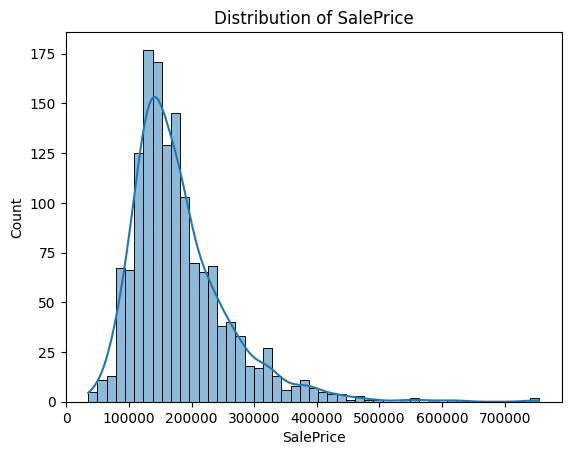

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of SalePrice
sns.histplot(data=home_data, x='SalePrice', kde=True)
plt.title('Distribution of SalePrice')
plt.show()



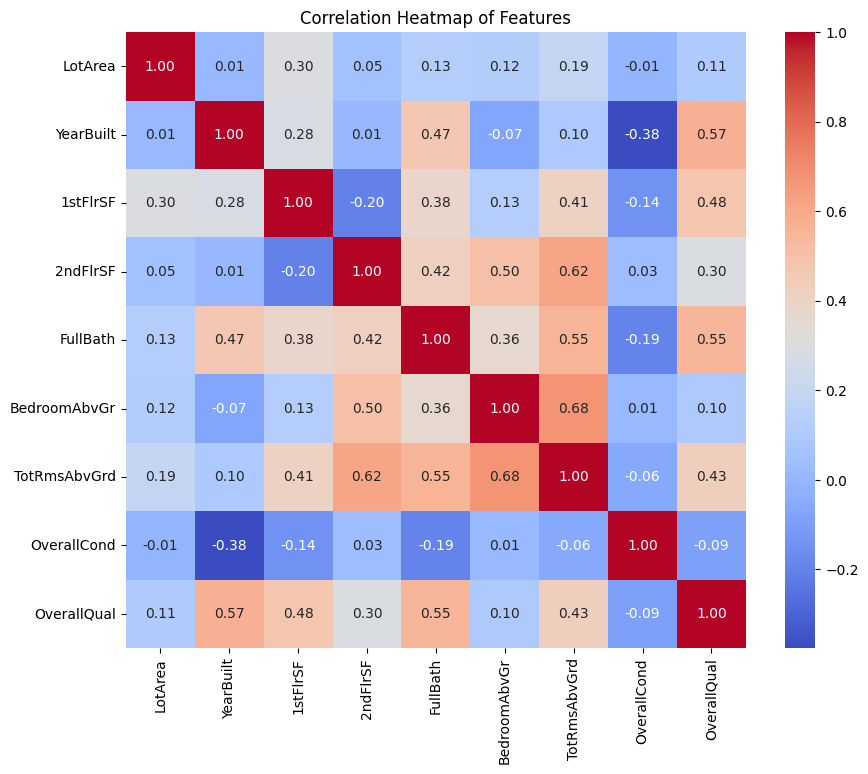

In [41]:
import numpy as np

# Correlation heatmap of the features and SalePrice
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap of Features')
plt.show()



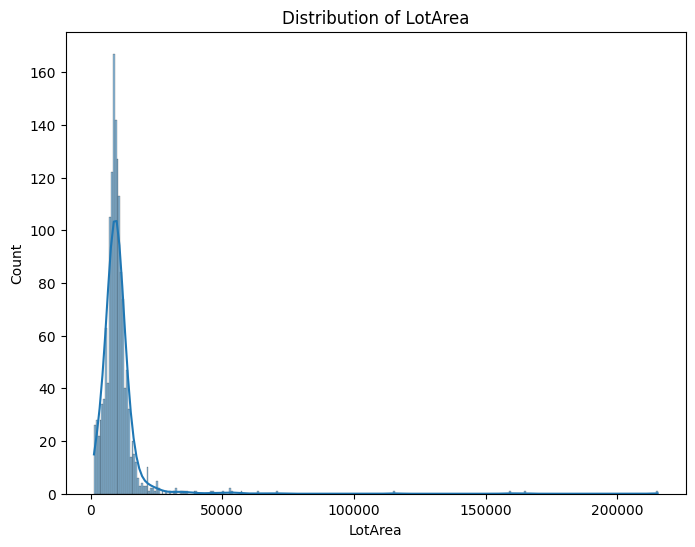

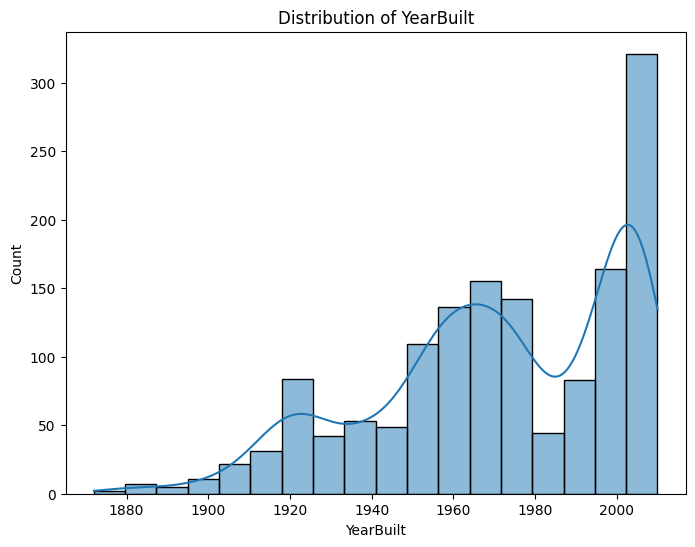

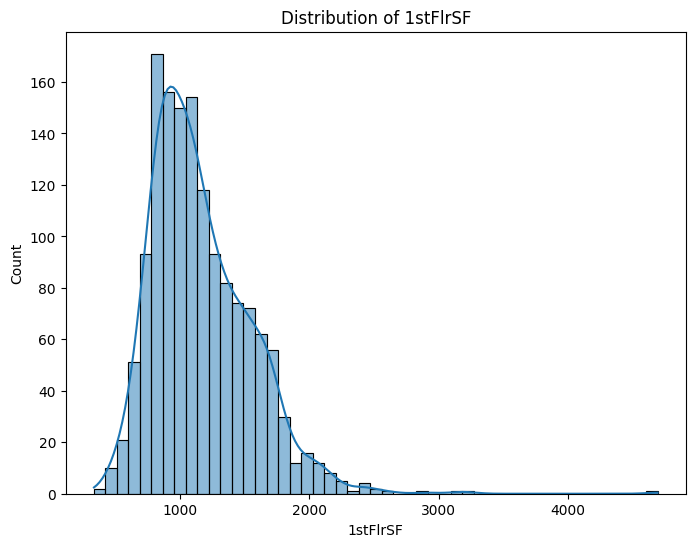

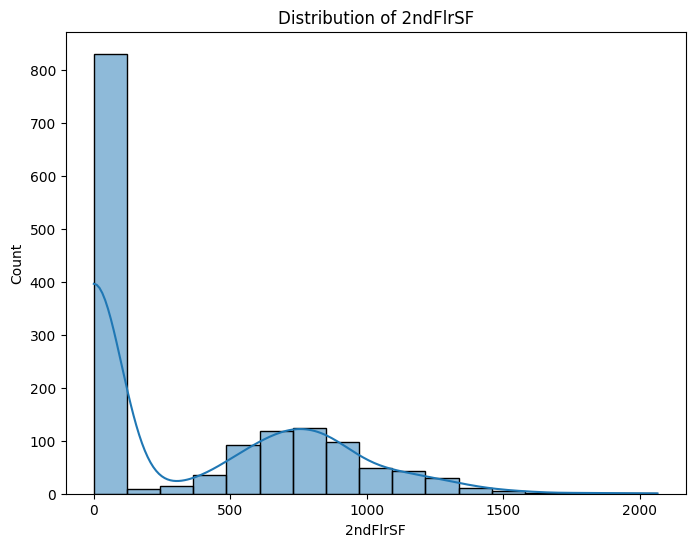

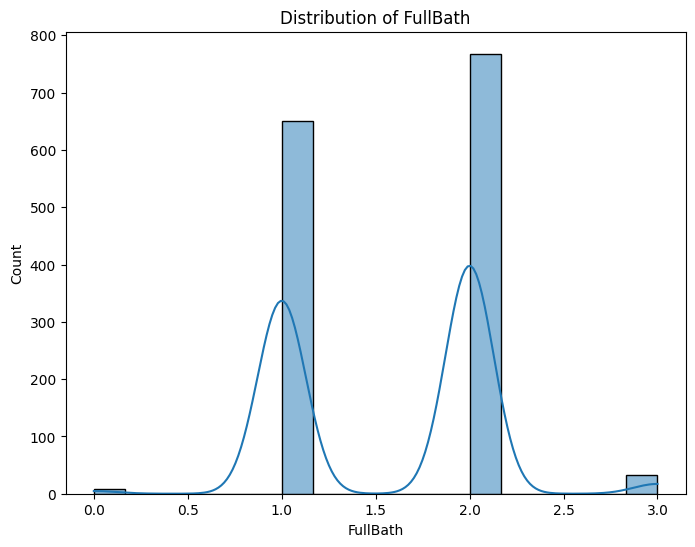

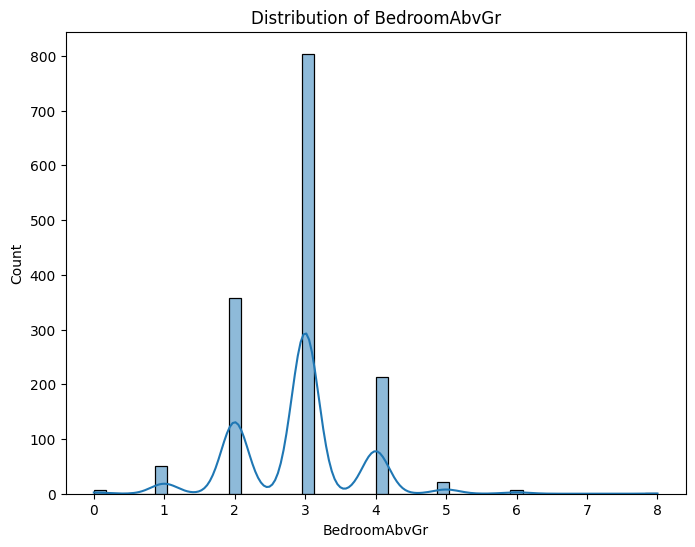

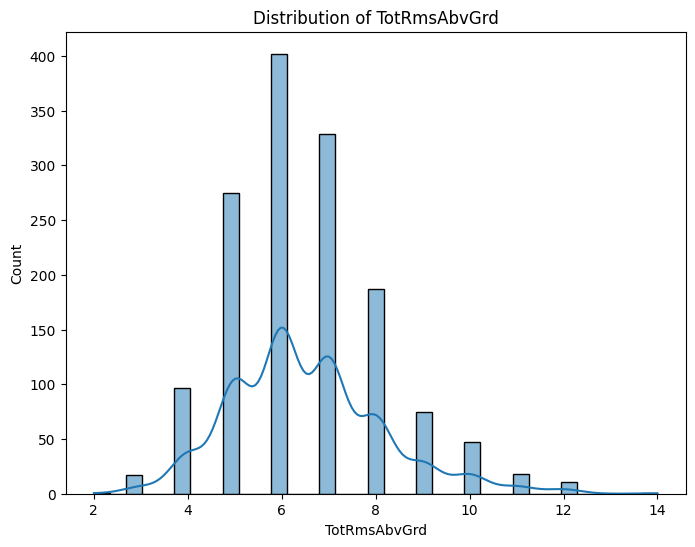

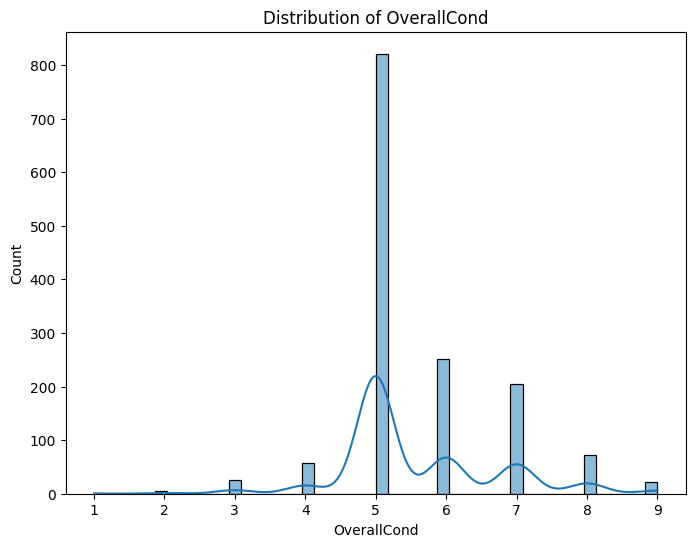

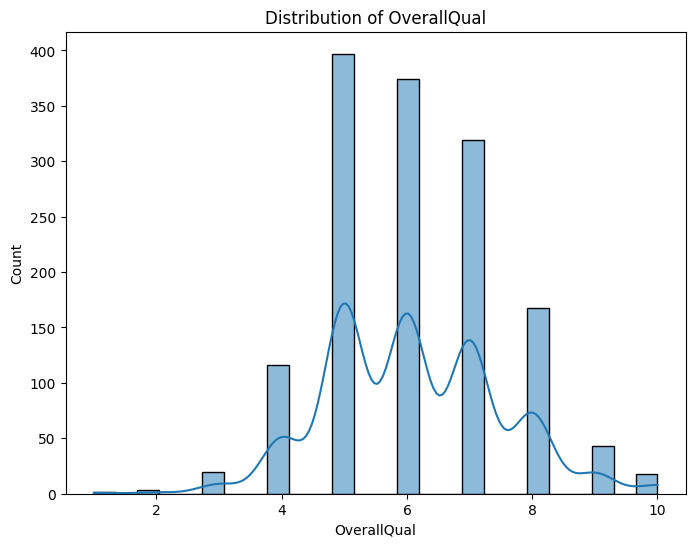

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=home_data, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



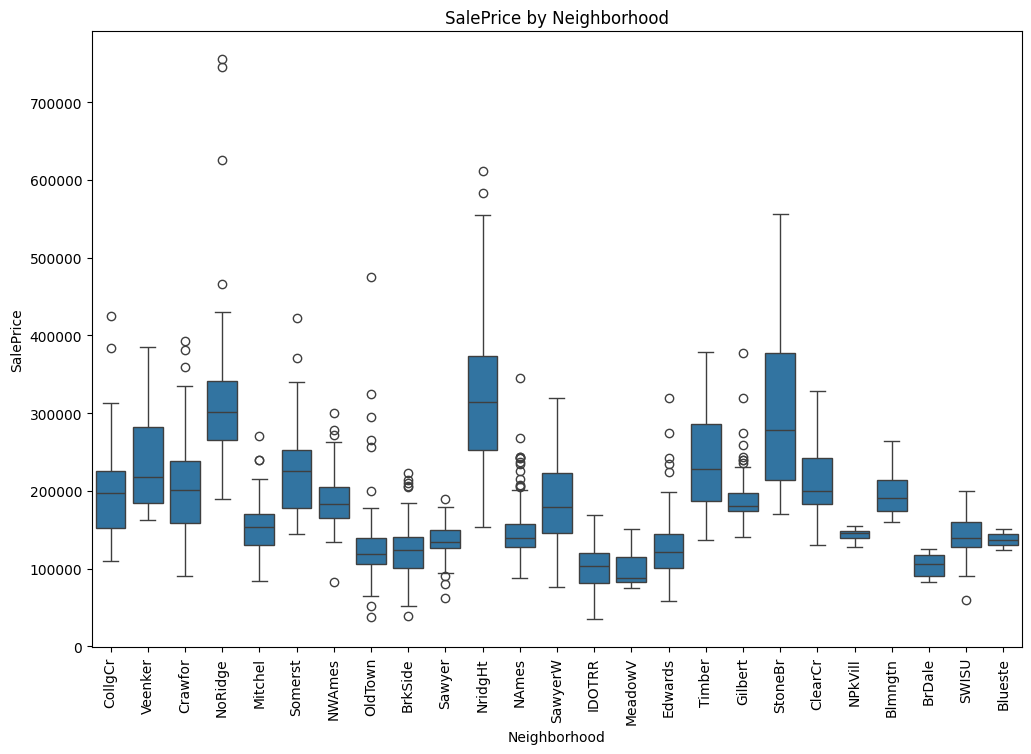

In [43]:
# Boxplot of SalePrice grouped by Neighborhood
plt.figure(figsize=(12, 8))
sns.boxplot(data=home_data, x='Neighborhood', y='SalePrice')
plt.title('SalePrice by Neighborhood')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


In [44]:
#trainig the decrision tree regressor model
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)
d_tree_model=DecisionTreeRegressor(random_state=1)
d_tree_model.fit(train_x, train_y)

decision_tree_prediction = d_tree_model.predict(val_x)
d_tree_mae= mean_absolute_error(decision_tree_prediction, val_y)
print("validation MAE got regression tree model is= {:,.0f}".format(d_tree_mae))

validation MAE got regression tree model is= 26,797


In [45]:
#MAX_LEAF_NODE

def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500, 750, 1000]

scores = {leaf_size: get_mae(leaf_size, train_x, val_x, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

best_tree_size = min(scores, key=scores.get)
print(best_tree_size)


# max_leaf_node_d_tree_model =DecisionTreeRegressor()

50


In [46]:
max_leaf_node_d_tree_model =DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
max_leaf_node_d_tree_model.fit(train_x, train_y)
max_leaf_prediction = max_leaf_node_d_tree_model.predict(val_x)

val_mae = mean_absolute_error(max_leaf_prediction, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 25,634


In [47]:
#RANDOM_FOREST mode
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_x, train_y)

rf_val_mae = mean_absolute_error(val_y, rf_model.predict(val_x))

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 18760.59116764514


In [37]:
#GRADIENT_BOOSTING_REGRESSER mdoel

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(train_x, train_y)

print("Best parameters found: ", grid_search.best_params_)
# gb_model = grid_search.best_estimator_


gb_model= GradientBoostingRegressor(n_estimators=200,random_state=1)

gb_model.fit(train_x, train_y)

gb_val_mae = mean_absolute_error(val_y, gb_model.predict(val_x))




print("Validation MAE for Gradient Boosting Model: {}".format(gb_val_mae))

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
Validation MAE for Gradient Boosting Model: 18623.843295637693


In [48]:
test_file_path = ('/content/test.csv')
testing_data = pd.read_csv(test_file_path)

ids = testing_data.pop('Id')

testing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [49]:
test_data= testing_data[features]

preds=gb_model.predict(test_data)

output = pd.DataFrame({'Id': ids, 'SalePrice': preds})

print(output.head())


     Id      SalePrice
0  1461  132179.127671
1  1462  164147.968565
2  1463  165551.974841
3  1464  179789.588242
4  1465  199328.351427


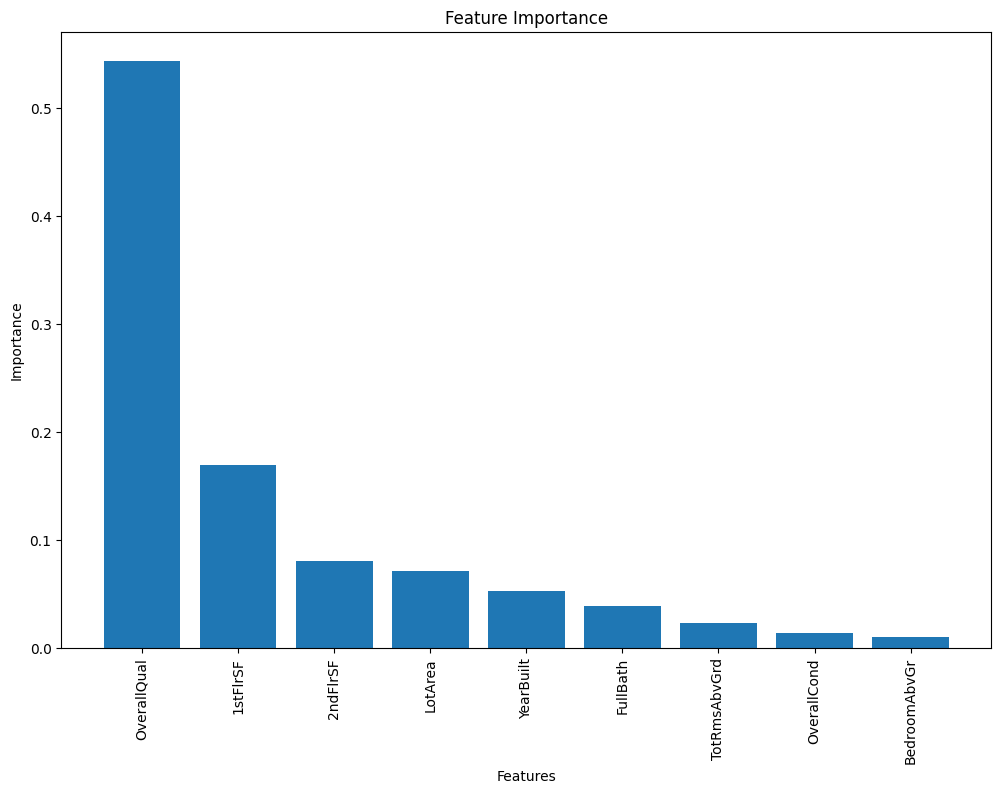

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


# Feature importance plot
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importance")  # Title: Feature Importance
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


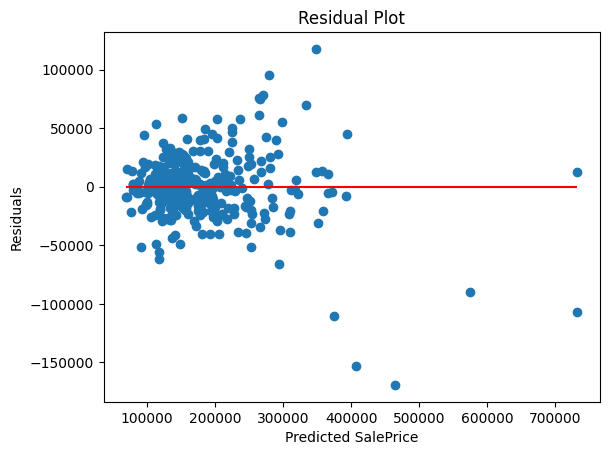

In [51]:
from sklearn.metrics import mean_squared_error

# Residual plot
predictions = gb_model.predict(val_x)
residuals = val_y - predictions

plt.scatter(predictions, residuals)
plt.hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='red')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


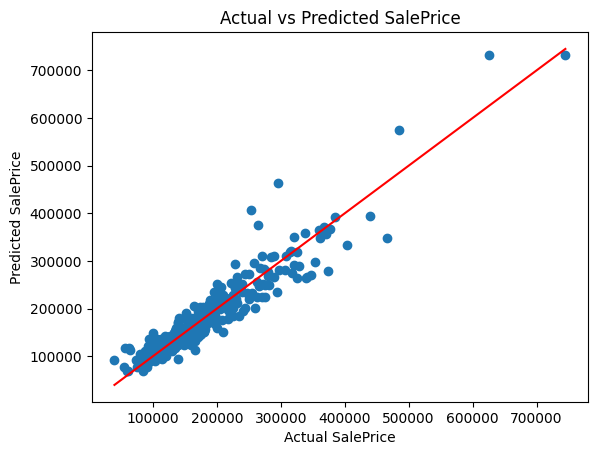

In [52]:
# Actual vs Predicted plot
plt.scatter(val_y, predictions)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()


In [53]:

sample_submission_df = pd.read_csv('/content/sample_submission.csv')

sample_submission_df['SalePrice'] = gb_model.predict(test_data)

sample_submission_df.to_csv('/content/kaggle/submission.csv', index=False)

print(sample_submission_df.head())


     Id      SalePrice
0  1461  132179.127671
1  1462  164147.968565
2  1463  165551.974841
3  1464  179789.588242
4  1465  199328.351427
